In [1]:
# To resample the samples

import numpy as np
from scipy.io import loadmat

train_data = loadmat('train_32x32.mat') # Loading the training dataset

train_X = train_data['X']
train_Y = train_data['y']

train_X = np.transpose(train_X, (3, 0, 1, 2))  # Transpose to (number_of_samples, width, height, channels)
train_X = train_X.astype('float32') / 255.0  # Normalizing pixel values

"""
Currently, 'train_X' contains the training data, and 'train_Y' contains the labels.

We randomly choose samples from the training dataset.

assuming that 'train_X' contains all of the training data, and 'train_Y' contains the labels that correspond to it.

'train_Y' is a NumPy array of labels, and 'train_X' should be a NumPy array with each row representing a data point.

"""

new_train_X = []
new_train_Y = []

samples = 2500

labels = np.unique(train_Y)

np.random.seed(42)

for label in labels:
    indices = np.where(train_Y == label)[0]
    
    temp = np.random.choice(indices, samples, replace=False)
    
    new_train_X.extend(train_X[temp])
    new_train_Y.extend(train_Y[temp])

new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)

# Now, 'new_train_X' contains the 25,000 selected samples, and 'new_train_Y' contains their corresponding labels.


# Q1.a

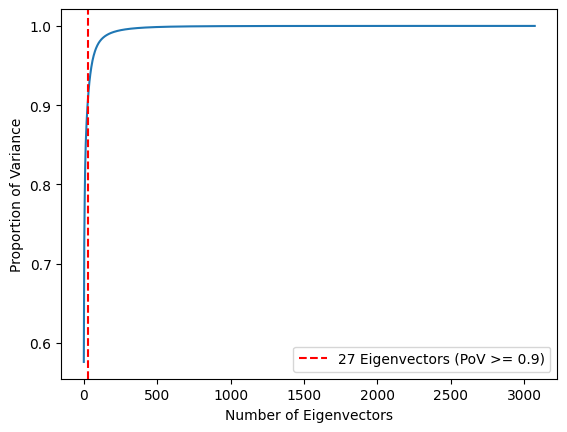

Number of top eigenvectors required to keep PoV >= 0.9: 27


In [2]:
#Q1.a

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n, w, h, c = new_train_X.shape
new_train_X = new_train_X.reshape(n, -1)

new_train_X = (new_train_X - np.mean(new_train_X, axis=0)) / np.std(new_train_X, axis=0)

pca = PCA()

pca.fit(new_train_X)

# Calculating the cumulative explained variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

eigen_vec = np.argmax(explained_variance_ratio >= 0.9) + 1

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Proportion of Variance')
plt.axvline(eigen_vec, color='red', linestyle='--', label=f'{eigen_vec} Eigenvectors (PoV >= 0.9)')
plt.legend()
plt.show()

print(f'Number of top eigenvectors required to keep PoV >= 0.9: {eigen_vec}')


# Q1.b

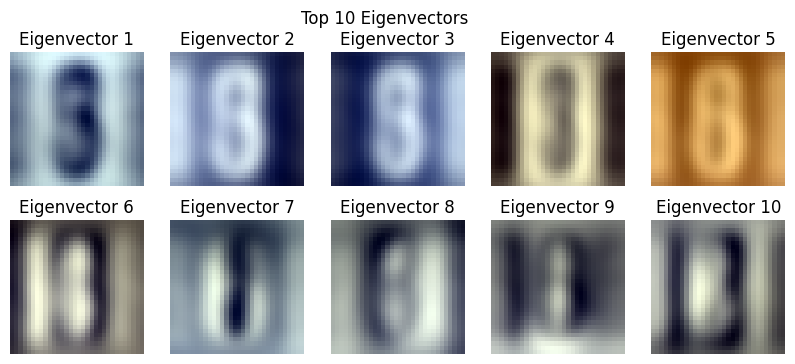

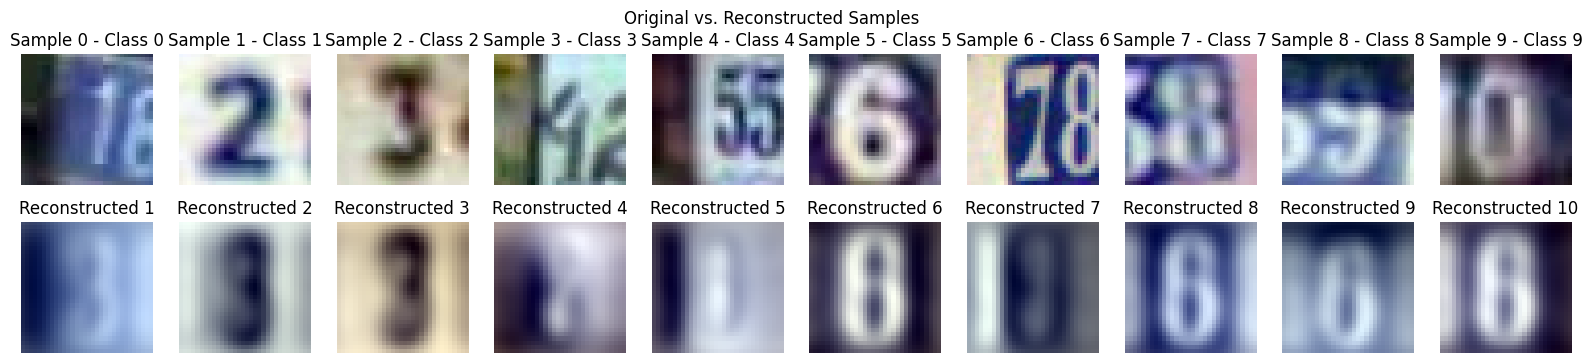

In [3]:
#Q1.b

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.decomposition import PCA

# Load SVHN data
data = loadmat('train_32x32.mat')

# Extract features and labels
X_train = data['X']
y_train = data['y']

# Reshape and transpose the data
X_train = X_train.transpose(3, 0, 1, 2).reshape(X_train.shape[3], -1)

# Randomly select samples from each class
np.random.seed(42)
samples_per_class = 2500

labels = np.unique(y_train)
subset_indices = []

for class_label in labels:
    indices_for_class = np.where(y_train == class_label)[0]
    selected_indices = np.random.choice(indices_for_class, samples_per_class, replace=False)
    subset_indices.extend(selected_indices)

X_subset = X_train[subset_indices]
y_subset = y_train[subset_indices]

# Perform PCA
pca = PCA(10)
X_pca = pca.fit_transform(X_subset)

# Visualize the top 10 eigenvectors
top_eigenvectors = pca.components_[:10]

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
fig.suptitle('Top 10 Eigenvectors')

for i, ax in enumerate(axes.flat):
    eigenvector = top_eigenvectors[i].reshape(32, 32, 3)
    normalized_eigenvector = (eigenvector - np.min(eigenvector)) / (np.max(eigenvector) - np.min(eigenvector))
    ax.imshow(normalized_eigenvector)
    ax.set_title(f'Eigenvector {i + 1}')
    ax.axis('off')

plt.show()

# Randomly select one sample per class for visualization
np.random.seed(42)
samples_per_class = 1

selected_samples = []

for label in np.unique(y_subset):
    indices = np.where(y_subset == label)[0]
    selected_index = np.random.choice(indices, samples_per_class, replace=False)
    selected_samples.extend(X_subset[selected_index])

# Reconstruct samples using the top eigenvectors
reconstructed_samples = pca.inverse_transform(pca.transform(selected_samples))

# Display original vs. reconstructed samples
pic, lines = plt.subplots(2, 10, figsize=(20, 4))
pic.suptitle('Original vs. Reconstructed Samples')

for i, ax in enumerate(lines.flat):
    if i < 10:
        sample_image = selected_samples[i].reshape(32, 32, 3)
        normalized_image = (sample_image - np.min(sample_image)) / (np.max(sample_image) - np.min(sample_image))
        ax.imshow(normalized_image)
        ax.set_title(f'Sample {i} - Class {i}')
    else:
        reconstructed = reconstructed_samples[i - 10].reshape(32, 32, 3)
        normalized_reconstructed = (reconstructed - np.min(reconstructed)) / (np.max(reconstructed) - np.min(reconstructed))
        ax.imshow(normalized_reconstructed)
        ax.set_title(f'Reconstructed {i - 9}')
    ax.axis('off')

plt.show()


# Q1.c 

This code may take a while, please wait.

In [4]:
#Q1.c

import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

test_data = loadmat('test_32x32.mat')

test_X = test_data['X']
test_Y = test_data['y']

test_X = np.transpose(test_X, (3, 0, 1, 2))  # Transpose to (number_of_samples, width, height, channels)
test_X = test_X.astype('float32') / 255.0  # Normalize pixel values

train_X, x, train_Y, y = train_test_split(new_train_X, new_train_Y, test_size=0.2, random_state=42)

# Function to evaluate k-NN
def evaluate_knn(train_X, train_Y, test_X, test_Y, k):
    
    knn = KNeighborsClassifier(n_neighbors=k) # Initialize k-NN classifier
    
    knn.fit(train_X, train_Y)
    
    y_pred = knn.predict(test_X)

    accuracy = accuracy_score(test_Y, y_pred) # Calculate accuracy
    
    return accuracy

print(f'This code may take a while to output, please wait.')

k_values = [5, 7]
for k in k_values:
    raw = evaluate_knn(train_X.reshape(train_X.shape[0], -1), train_Y.ravel(), test_X.reshape(test_X.shape[0], -1), test_Y.ravel(), k)
    print(f'Accuracy of k-NN on raw data with k={k}: {raw}')

# Evaluate k-NN on PCA-transformed data
dim = [eigen_vec, 10]  
for d in dim:
    # Transform the data with PCA
    pca = PCA(n_components=d)
    train_X_pca = pca.fit_transform(train_X.reshape(train_X.shape[0], -1))
    test_X_pca = pca.transform(test_X.reshape(test_X.shape[0], -1))
    
    for k in k_values:
        acc = evaluate_knn(train_X_pca, train_Y.ravel(), test_X_pca, test_Y.ravel(), k)
        print(f'Accuracy of k-NN on PCA-transformed data with dimension={d} and k={k}: {acc}')


This code may take a while to output, please wait.
Accuracy of k-NN on raw data with k=5: 0.15342655193607868
Accuracy of k-NN on raw data with k=7: 0.15861247695144437
Accuracy of k-NN on PCA-transformed data with dimension=27 and k=5: 0.1509680393362016
Accuracy of k-NN on PCA-transformed data with dimension=27 and k=7: 0.14532114320835895
Accuracy of k-NN on PCA-transformed data with dimension=10 and k=5: 0.1470881991395206
Accuracy of k-NN on PCA-transformed data with dimension=10 and k=7: 0.12995543945912721


# Q2.a

This code may take a while to display the images, please wait.


This code may take a while to output, please wait.


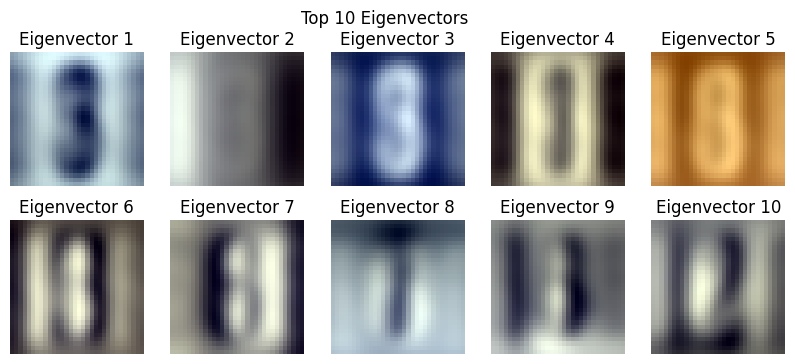

Yes,we observe images from the same class to be clustered together


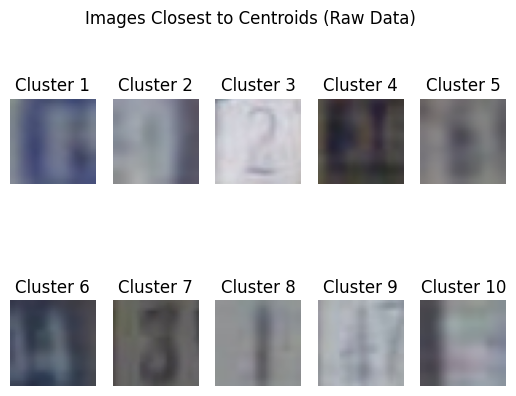

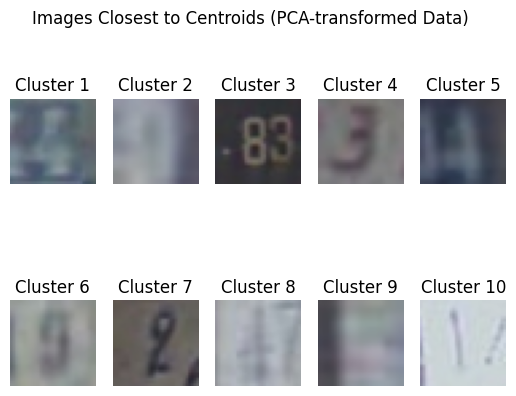

In [5]:
#Q2.a

import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

train_data = loadmat('train_32x32.mat')

train_X = train_data['X']
train_Y = train_data['y']

train_X = np.transpose(train_X, (3, 0, 1, 2))  # Transpose to (number_of_samples, width, height, channels)
train_X = train_X.astype('float32') / 255.0  # Normalize pixel values

n, w, h, c = train_X.shape
train_X_flat = train_X.reshape(n, -1)

pca = PCA()
train_X_pca = pca.fit_transform(train_X_flat)

print(f'This code may take a while to output, please wait.')

# Number of top eigenvectors required to keep the proportion of variance above 0.9
eigen_vec = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9) + 1

top_eigen = pca.components_[:10]
pic, lines = plt.subplots(2, 5, figsize=(10, 4))
pic.suptitle('Top 10 Eigenvectors')

for i, j in enumerate(lines.flat):
    v = top_eigen[i].reshape(w, h, c)
    n_v = (v - np.min(v)) / (np.max(v) - np.min(v))
    j.imshow(n_v)
    j.set_title(f'Eigenvector {i + 1}')
    j.axis('off')

plt.show()

print(f'Yes,we observe images from the same class to be clustered together')

k_raw = KMeans(n_clusters=10, random_state=42, n_init=10)  # Set n_init explicitly
k_raw.fit(train_X_flat)

k_pca = KMeans(n_clusters=10, random_state=42, n_init=10)  # Set n_init explicitly
k_pca.fit(train_X_pca[:, :eigen_vec])

def get_closest_image(centroid, data):
    distance = np.linalg.norm(data - centroid, axis=1)
    return np.argmin(distance)

for i, j in enumerate(k_raw.cluster_centers_):
    index = get_closest_image(j, train_X_flat)
    image = train_X[index]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(f'Cluster {i + 1}')
    plt.axis('off')

plt.suptitle('Images Closest to Centroids (Raw Data)')
plt.show()

# Display images closest to the centroids for PCA-transformed data
for i, j in enumerate(k_pca.cluster_centers_):
    index = get_closest_image(j, train_X_pca[:, :eigen_vec])
    image = train_X[index]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(f'Cluster {i + 1}')
    plt.axis('off')

plt.suptitle('Images Closest to Centroids (PCA-transformed Data)')
plt.show()


# Q2.b

In [6]:
#Q2.b

from sklearn.metrics import pairwise_distances_argmin_min, completeness_score, homogeneity_score, v_measure_score, adjusted_rand_score

# calculates Sum Squared Error(sse)
def calculate_sse(data, centroids, labels): 
    sse = np.sum(np.square(pairwise_distances_argmin_min(data, centroids)[1]))
    return sse

# calculates Purity, Rand-Index, and Adjusted Rand-Index
def evaluate_clustering(l_true, l_pred):
    purity = completeness_score(l_true, l_pred)
    rand_index = adjusted_rand_score(l_true, l_pred)
    return purity, rand_index

train_Y_flat = train_Y.flatten()

sse_raw = calculate_sse(train_X_flat, k_raw.cluster_centers_, k_raw.labels_)
pur_raw, ind_raw = evaluate_clustering(train_Y_flat, k_raw.labels_)

print(f"Raw Data:")
print(f"Sum Squared Error: {sse_raw}")
print(f"Purity: {pur_raw}")
print(f"Rand-Index: {ind_raw}")
print("")

sse_pca = calculate_sse(train_X_pca[:, :eigen_vec], k_pca.cluster_centers_, k_pca.labels_)
pur_pca, ind_pca = evaluate_clustering(train_Y_flat, k_pca.labels_)

print(f"PCA-transformed Data:")
print(f"Sum Squared Error: {sse_pca}")
print(f"Purity: {pur_pca}")
print(f"Rand-Index: {ind_pca}")

Raw Data:
Sum Squared Error: 3627421.2467963696
Purity: 0.0027080827131196286
Rand-Index: -0.0003045287007211472

PCA-transformed Data:
Sum Squared Error: 2745689.5
Purity: 0.002603133959363162
Rand-Index: -0.00034855281119401666


# Q2.c

In [7]:
#Q2.c

import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

test_data = loadmat('test_32x32.mat')

test_X = test_data['X']
test_Y = test_data['y']

test_X = np.transpose(test_X, (3, 0, 1, 2))  # Transposing to (number_of_samples, width, height, channels)
test_X = test_X.astype('float64') / 255.0  # Normalizing pixel values and change to 'double'

num_raw = 10 
k_raw = KMeans(n_clusters=num_raw, n_init=10, random_state=42)
labls_raw = k_raw.fit_predict(new_train_X.reshape(new_train_X.shape[0], -1).astype('float64'))

# Assigns labels to clusters based on the most frequent digit
def assign_cluster_labels(labels, train_Y, num_clusters):
    temp = np.zeros(num_clusters, dtype=int)
    for cluster in range(num_clusters):
        index = np.where(labels == cluster)
        cluster_digits = train_Y[index]
        freq = np.bincount(cluster_digits).argmax()
        temp[cluster] = freq
    return temp

digit_raw = assign_cluster_labels(labls_raw, train_Y.ravel(), num_raw)

# Predicts labels for test data based on cluster assignments
def predict_labels(test_X, labels, digit_labels, kmeans_model):
    test_X_flat = test_X.reshape(test_X.shape[0], -1)
    pred_labels = np.zeros(test_X.shape[0], dtype=int)
    for i in range(test_X_flat.shape[0]):
        # Find the nearest cluster for each test sample
        nearest = kmeans_model.predict([test_X_flat[i]])[0]
        pred_labels[i] = digit_labels[nearest]
    return pred_labels


y_pred_pca = predict_labels(test_X, labls_raw, digit_raw, k_raw)

acc_clus_raw = accuracy_score(test_Y.ravel(), y_pred_pca)
print(f'Accuracy of unsupervised clustering method on raw data: {acc_clus_raw}')


# eigen_vec = 27  
# pca = PCA(n_components=eigen_vec)
# train_X_pca = pca.fit_transform(new_train_X.reshape(new_train_X.shape[0], -1))

# test_X_pca = pca.transform(test_X.reshape(test_X.shape[0], -1))

# num_clusters_pca = 10  
# k_pca = KMeans(n_clusters=num_clusters_pca, n_init=10, random_state=42)
# lables_pca = k_pca.fit_predict(train_X_pca)

# digits_pca = assign_cluster_labels(lables_pca, train_Y.ravel(), num_clusters_pca)

# y_pred_pca = predict_labels(test_X_pca, lables_pca, digits_pca, k_pca)

# acc_pca = accuracy_score(test_Y.ravel(), y_pred_pca)
# print(f'Accuracy of unsupervised clustering method on PCA-transformed data: {acc_pca}')



Accuracy of unsupervised clustering method on raw data: 0.1958743085433313


Accuracy of k-NN classifier in Q1 (c) with k=5 is 0.15342655193607868

In this case, the unsupervised clustering method performed better in terms of accuracy compared to the k-NN classifier. 

# Q2.d

Sum Squared Error for k=5: 42.623268127441406


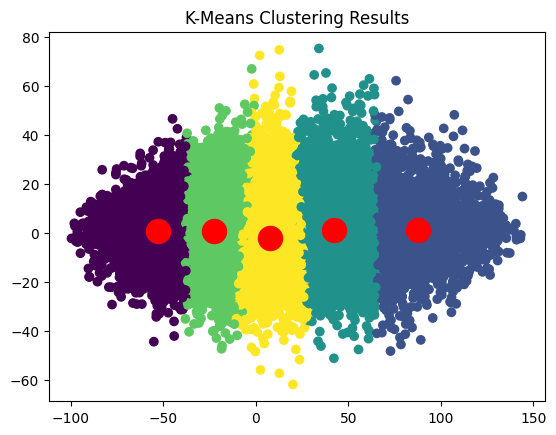

In [8]:
#Q2.d

import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

num_samples, data_dim = new_train_X.shape[0], np.prod(new_train_X.shape[1:])
new_train_X_reshaped = new_train_X.reshape(num_samples, data_dim)

new_train_X_stan = (new_train_X_reshaped - np.mean(new_train_X_reshaped, axis=0)) / np.std(new_train_X_reshaped, axis=0)

pca = PCA(n_components=eigen_vec)
X_pca = pca.fit_transform(new_train_X_stan)

# k-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) 
labels = kmeans.fit_predict(X_pca)

# Calculate the sum squared error
sse = mean_squared_error(X_pca, kmeans.cluster_centers_[kmeans.labels_])

print(f'Sum Squared Error for k=5: {sse}')

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-Means Clustering Results')
plt.show()
